<a href="https://colab.research.google.com/github/syaaa11/UTS-Machine-Learning-Option-1/blob/main/Thasya_Mulia_1103201208_UTS_Machine_Learning_Option_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

   mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   mean fractal dimension  ...  worst texture  worst perimeter  worst area  \
0             

/usr/local/lib/python3.9/dist-packages/sklearn/semi_supervised/_self_training.py:212: UserWarning: y contains no unlabeled samples
  warnings.warn("y contains no unlabeled samples", UserWarning)


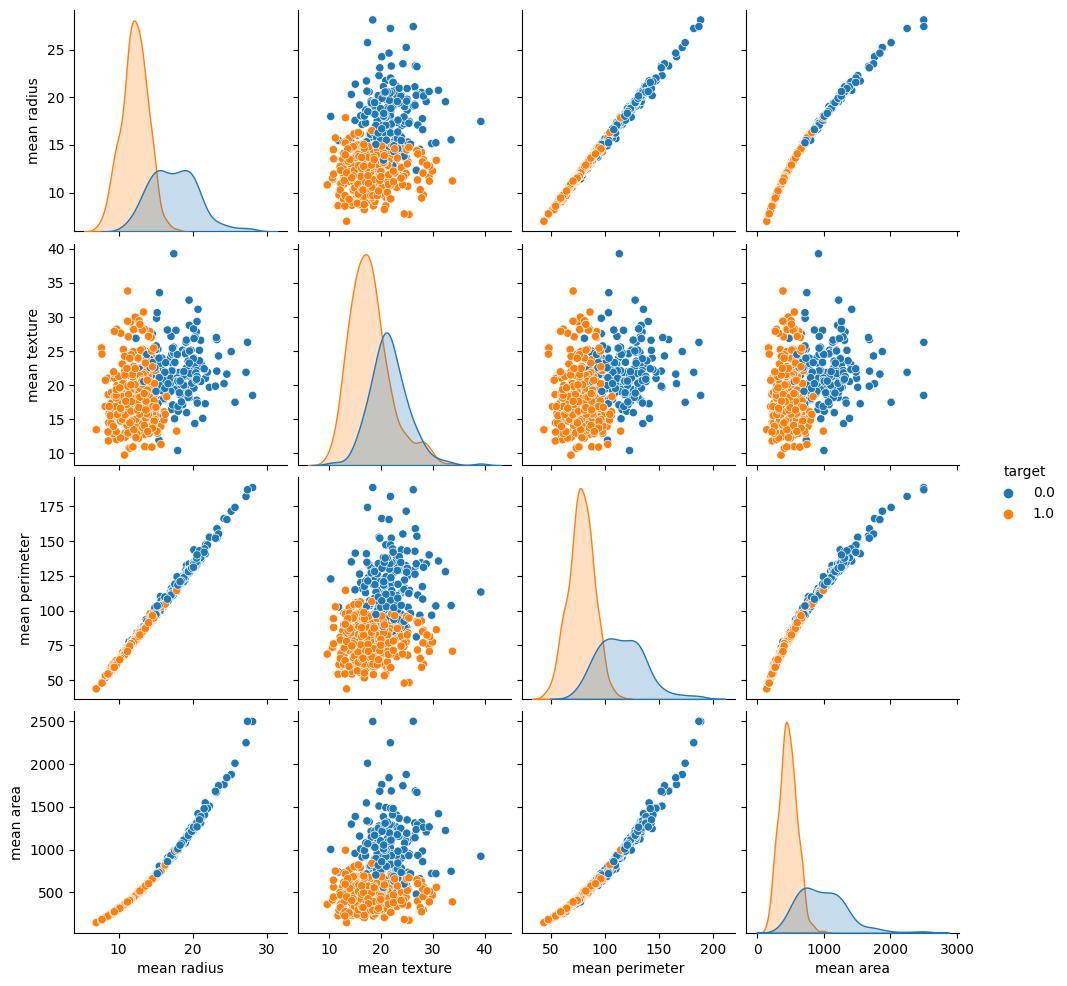

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()
# Load dataset
data = load_breast_cancer()

# Convert to pandas DataFrame
df = pd.DataFrame(data['data'], columns=data['feature_names'])
df = pd.DataFrame(np.c_[cancer['data'], cancer['target']],
                  columns=np.append(cancer['feature_names'], ['target']))
print(df.head())
if 'df' in locals():
    print("Dataset telah dimuat ke dalam variabel 'df'.")
else:
    print("Gagal memuat dataset.")
sns.pairplot(df, hue='target', vars=['mean radius', 'mean texture', 'mean perimeter', 'mean area'])
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

X = df.drop('target', axis=1)
y = df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Decision Tree Classifier
tree = DecisionTreeClassifier()
tree.fit(X_train, y_train)
y_pred = tree.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print(f"Accuracy of Decision Tree Classifier: {acc:.2f}")

# Random Forest Classifier
rf = RandomForestClassifier(n_estimators=100)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print(f"Accuracy of Random Forest Classifier: {acc:.2f}")

# Self-Training
from sklearn.semi_supervised import SelfTrainingClassifier

# Set up the base classifier
base_classifier = DecisionTreeClassifier()

# Set up the self-training classifier
self_training = SelfTrainingClassifier(base_classifier, max_iter=50)

# Fit the self-training classifier
self_training.fit(X_train, y_train)

# Predict on the test set
y_pred = self_training.predict(X_test)

# Compute accuracy
acc = accuracy_score(y_test, y_pred)
print(f"Accuracy of Self-Training Classifier: {acc:.2f}")